## Data Science Project Proposal

### Introduction
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal Clearly state the question you will try to answer with your project Identify and describe the dataset that will be used to answer the question

According to the NY Department of Health, 1 in 5 people die from heart disease. But, while heart disease is a major problem to billions of people worldwide, there are medical treatments for most types of heart disease if discovered early. This is the importance of investigating factors that lead to the development of heart disease. We can use We aim to use classification modelling Is it possible to predict an individual's chances of developing heart disease using their medical test data? (looking at their age, cholesterol, blood sugar, and resting heart rate?)

### Preliminary Exploratory Data Analysis

Importing the libraries needed for the project.

In [25]:
# install and import packages
install.packages(c("languageserver", "repr", "tidymodels", "RColorBrewer"))
library(tidyverse)
library(repr)
library(tidymodels)
library(RColorBrewer)

Warning message:
"packages 'repr', 'tidymodels', 'RColorBrewer' are in use and will not be installed"
Installing package into 'C:/Users/Jason/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'languageserver' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'languageserver'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Jason\AppData\Local\R\win-library\4.3\00LOCK\languageserver\libs\x64\languageserver.dll to C:\Users\Jason\AppData\Local\R\win-library\4.3\languageserver\libs\x64\languageserver.dll: Permission denied"
Warning message:
"restored 'languageserver'"



The downloaded binary packages are in
	C:\Users\Jason\AppData\Local\Temp\RtmpMRwU2E\downloaded_packages


Downloading and reading the <a href="https://archive.ics.uci.edu/dataset/45/heart+disease">data</a>.

In [26]:
url <- "https://archive.ics.uci.edu/static/public/45/heart+disease.zip"
dest <- "data/file.zip"

# checks if the data file exists
if (!dir.exists("data/")) {
  #creates the file if it doesn't exist
  dir.create("data/", recursive = TRUE)
}

# downloads the file from the url to data file
download.file(url, dest)

# unzips the file
unzip(zipfile = dest,
      files = "processed.cleveland.data",
      exdir = "data/")

# added column names to the data
cleveland_data_col_names <- c("age",
                              "sex",
                              "cp",
                              "trestbps",
                              "chol", "fbs",
                              "restecg", "thalach",
                              "exang",
                              "oldpeak",
                              "slope",
                              "ca",
                              "thal",
                              "num")

# reading the data by csv
cleveland_data <- read_csv("data/processed.cleveland.data",
                           col_names = cleveland_data_col_names)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#### Describing The Data

**Which features are available in the dataset?**

In [27]:
# taking a look at the features in the dataset
print(cleveland_data_col_names)

 [1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "num"     


**What type of data is in the dataset?**
- All of the variables in the dataset is already split into dbl and chr type.

In [28]:
# taking a look at the data patterns
glimpse(cleveland_data)

Rows: 303
Columns: 14
$ age      <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 5…
$ sex      <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <dbl> 1, 4, 4, 3, 2, 2, 4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 1…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <dbl> 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <dbl> 3, 2, 2, 3, 1, 1, 3, 1, 2, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 2…
$ ca       <chr> "0.0", "3.0", "2.0", "0.0", "0.0", "0.0", "2.0", "0.0", "1.0"…
$ thal     <chr> "

**Are there feature containing missing data?**
- There are missing data in the `ca` and `thal` column

In [29]:
# making a tibble with column type and the number of nulls in each column
cleveland_summary <- tibble(
  ColumnName = cleveland_data_col_names,
  NumNulls = map_dbl(cleveland_data, ~sum(.x == "?", na.rm = TRUE)),
  NumNAs = map_dbl(cleveland_data, ~sum(is.na(.x))),
  TotalMissing = map_dbl(cleveland_data,
                         ~sum(.x == "?", na.rm = TRUE) + sum(is.na(.x))),
  ColumnType = map_chr(cleveland_data, ~class(.x))
)
print(cleveland_summary)

# A tibble: 14 × 5
   ColumnName NumNulls NumNAs TotalMissing ColumnType
   <chr>         <dbl>  <dbl>        <dbl> <chr>     
 1 age               0      0            0 numeric   
 2 sex               0      0            0 numeric   
 3 cp                0      0            0 numeric   
 4 trestbps          0      0            0 numeric   
 5 chol              0      0            0 numeric   
 6 fbs               0      0            0 numeric   
 7 restecg           0      0            0 numeric   
 8 thalach           0      0            0 numeric   
 9 exang             0      0            0 numeric   
10 oldpeak           0      0            0 numeric   
11 slope             0      0            0 numeric   
12 ca                4      0            4 character 
13 thal              2      0            2 character 
14 num               0      0            0 numeric   


**What are the unique values of each column?**

From this, we found that the columns: `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, and `num` is originally represented as categorical variables.

In [30]:
# Get all the unique values per column
cleveland_unique <- lapply(cleveland_data, unique)

# counts the number of different uniques per column
unique_counts <- sapply(cleveland_unique, length)

# only keep the columns where theres less than 10 uniques
cleveland_unique <- cleveland_unique[unique_counts < 10]

print(cleveland_unique)

$sex
[1] 1 0

$cp
[1] 1 4 3 2

$fbs
[1] 1 0

$restecg
[1] 2 0 1

$exang
[1] 0 1

$slope
[1] 3 2 1

$ca
[1] "0.0" "3.0" "2.0" "1.0" "?"  

$thal
[1] "6.0" "3.0" "7.0" "?"  

$num
[1] 0 2 1 3 4



#### Data Transformation

**Transforming the `ca` and `thal` column to dbl.**

In [31]:
cleveland_data <- cleveland_data |>
  mutate(ca = as.numeric(ca),
         thal = as.numeric(thal))
head(cleveland_data)

Warning message:
"There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning."


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


**Remove the rows containing NA or ?**

In [32]:
# filtering the dataset so only the column without NA remains
cleveland_filtered <- cleveland_data %>%
  filter(!if_any(everything(), is.na))

# making a tibble with column type and the number of nulls
# in each column to make sure Na is removed
cleveland_summary <- tibble(
  ColumnName = cleveland_data_col_names,
  NumNulls = map_dbl(cleveland_filtered, ~sum(.x == "?", na.rm = TRUE)),
  NumNAs = map_dbl(cleveland_filtered, ~sum(is.na(.x))),
  TotalMissing = map_dbl(cleveland_filtered,
                         ~sum(.x == "?", na.rm = TRUE) + sum(is.na(.x))),
  ColumnType = map_chr(cleveland_filtered, ~class(.x))
)
print(cleveland_summary)

# A tibble: 14 × 5
   ColumnName NumNulls NumNAs TotalMissing ColumnType
   <chr>         <dbl>  <dbl>        <dbl> <chr>     
 1 age               0      0            0 numeric   
 2 sex               0      0            0 numeric   
 3 cp                0      0            0 numeric   
 4 trestbps          0      0            0 numeric   
 5 chol              0      0            0 numeric   
 6 fbs               0      0            0 numeric   
 7 restecg           0      0            0 numeric   
 8 thalach           0      0            0 numeric   
 9 exang             0      0            0 numeric   
10 oldpeak           0      0            0 numeric   
11 slope             0      0            0 numeric   
12 ca                0      0            0 numeric   
13 thal              0      0            0 numeric   
14 num               0      0            0 numeric   


**Transforming the `num` column into 0 and 1**
- Since `num` is what we are trying to predict, we want to have it in a categorical format.
- In `num`, any number greater than 0 represents diagnosis of coronary artery disease

In [33]:
# turn num into either 0 or 1
cleveland_filtered <- cleveland_filtered |>
  mutate(num = ifelse(num > 0, 1, 0))

print(unique(cleveland_filtered$num))

[1] 0 1


**Turning `num` into a factor**
- Positive for when num > 0
- Negative for when num = 0

In [34]:
# using num as a factor and renaming the categories
cleveland_filtered <- cleveland_filtered |>
  mutate(num = as_factor(num)) |>
  mutate(num = fct_recode(num, "Positive" = "1", "Negative" = "0"))

head(cleveland_filtered)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,Negative
67,1,4,160,286,0,2,108,1,1.5,2,3,3,Positive
67,1,4,120,229,0,2,129,1,2.6,2,2,7,Positive
37,1,3,130,250,0,0,187,0,3.5,3,0,3,Negative
41,0,2,130,204,0,2,172,0,1.4,1,0,3,Negative
56,1,2,120,236,0,0,178,0,0.8,1,0,3,Negative


#### Splitting Data

**Before we start with the feature selection, we will split the data into train test splits to avoid breaking the golden rule.**

**This ensures that the feature selection is influenced only by the training data.**

In [35]:
# creating the split object
cleveland_split <- initial_split(cleveland_filtered, prop = 0.8, strata = num)

# creating the training split
cleveland_train <- training(cleveland_split)

# creating the testing split
cleveland_test <- testing(cleveland_split)

glimpse(cleveland_train)


Rows: 237
Columns: 14
$ age      <dbl> 63, 37, 41, 57, 44, 52, 57, 54, 48, 49, 64, 58, 50, 58, 43, 6…
$ sex      <dbl> 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0…
$ cp       <dbl> 1, 3, 2, 4, 2, 3, 3, 4, 3, 2, 1, 1, 3, 3, 4, 1, 4, 3, 4, 3, 2…
$ trestbps <dbl> 145, 130, 130, 120, 120, 172, 150, 140, 130, 130, 110, 150, 1…
$ chol     <dbl> 233, 250, 204, 354, 263, 199, 168, 239, 275, 266, 211, 283, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0…
$ restecg  <dbl> 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ thalach  <dbl> 150, 187, 172, 163, 173, 162, 174, 160, 139, 171, 144, 162, 1…
$ exang    <dbl> 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.6, 0.0, 0.5, 1.6, 1.2, 0.2, 0.6, 1.8, 1.0, 1…
$ slope    <dbl> 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1…
$ ca       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2…
$ thal     <dbl> 6

#### Feature Selection
kNN is an algorithm that does not work well with many predictors. To choose the predictors used for kNN, we have determined from research that `cp`, `trestbps`, `chol`, and `thalach` are good indicators for heart disease.

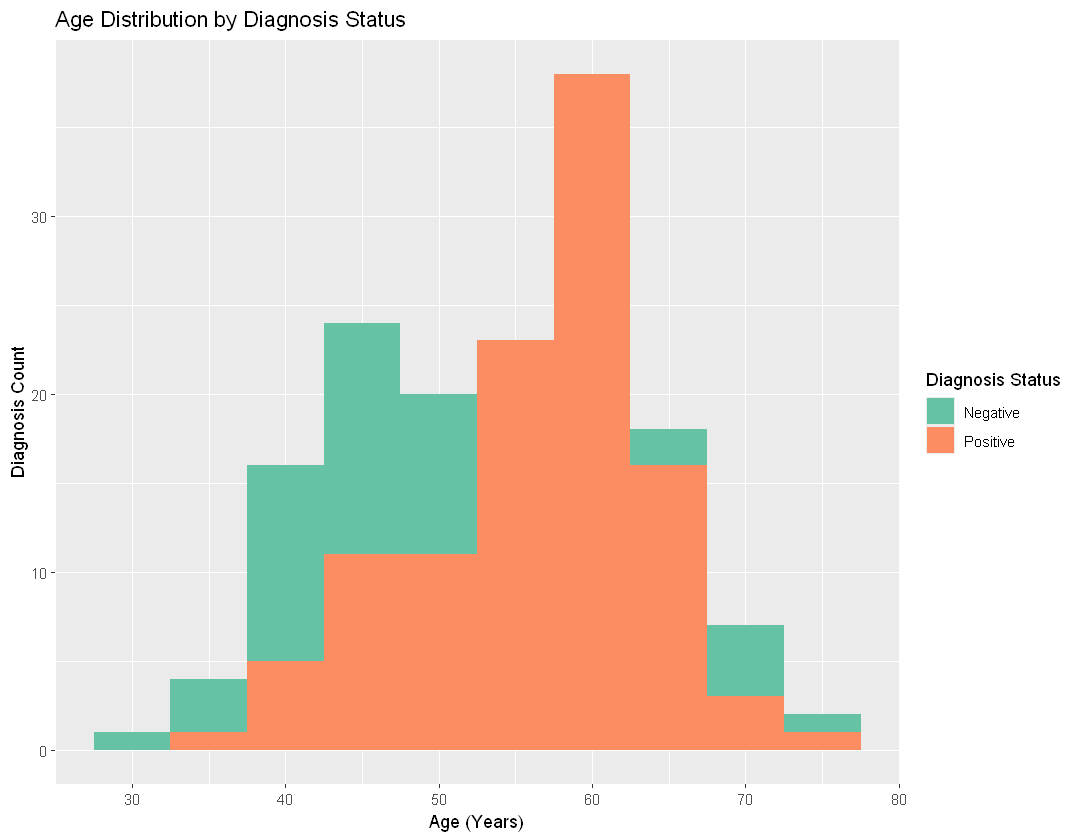

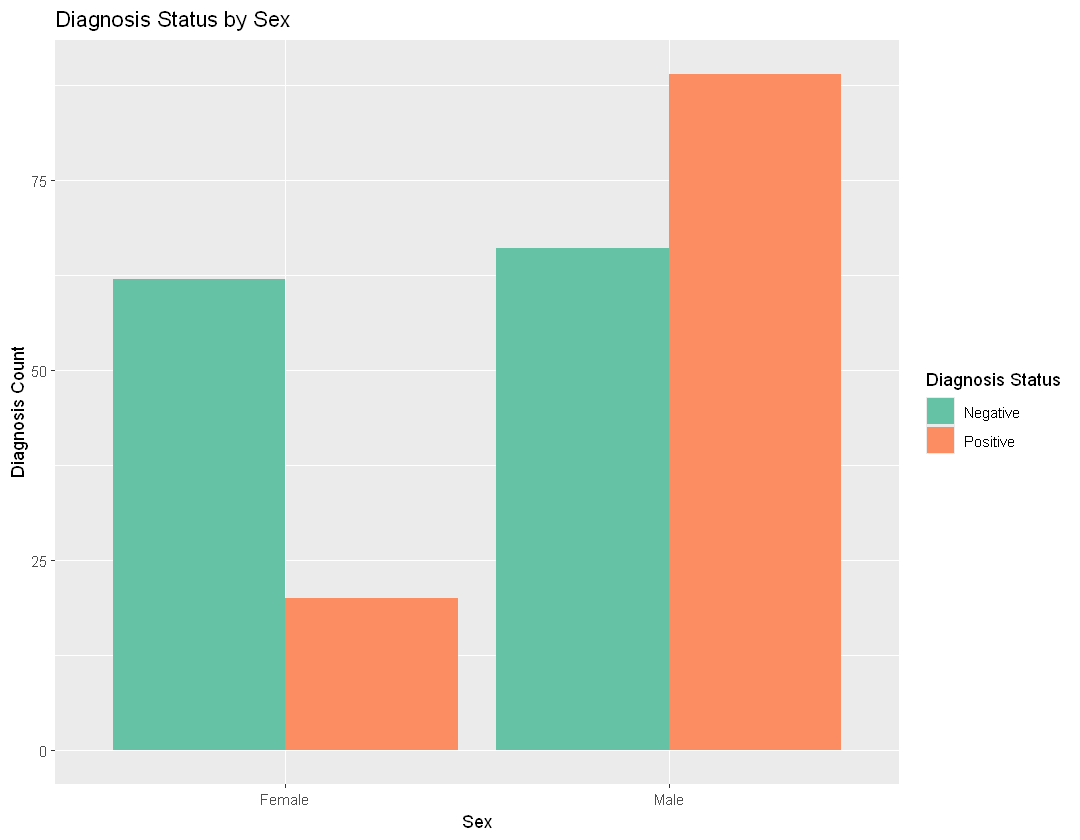

In [36]:
options(repr.plot.width = 9, repr.plot.height = 7)

# graph to compare the age and diagnosis count
age_dist <- cleveland_train |>
  ggplot(aes(x = age, fill = num)) +
  geom_histogram(position = "identity", binwidth = 5) +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Age Distribution by Diagnosis Status",
       x = "Age (Years)",
       y = "Diagnosis Count",
       fill = "Diagnosis Status")

age_dist

# graph to compare the sex and diagnosis count
gender_dist <- cleveland_train |>
  mutate(sex = as_factor(sex)) |>
  mutate(sex = fct_recode(sex, "Male" = "1", "Female" = "0")) |>
  ggplot(aes(x = as_factor(sex), fill = num)) +
  geom_bar(position = "dodge") +
  scale_fill_brewer(palette = "Set2") +
  labs(title = "Diagnosis Status by Sex",
       x = "Sex",
       y = "Diagnosis Count",
       fill = "Diagnosis Status")

gender_dist

### Methods

This is just for deciding what variables to use:


col_names = c(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num) 
#for the prelim later

age, sex, cholesterol, fasting blood sugar, rest ecg(heartrate and rhythm), thalac (max heart rate), exang (Exercise induced pain in chest), 

For ST in ECG: https://www.ncbi.nlm.nih.gov/books/NBK459364/
oldpeak (not really sure, ST depression in electrocardiogram), slope (0 downsloping, 1 flat, >=2 upsloping), Coronary artery disease (0-3), thalassemia (abnormal blood cells (less hemoglobin)), number of heart diseases (i think)

### for the prelim later

Age: age is the biggie

Cholesterol: second biggie

Thalach (Max heart rate): max heart rate during exercise is pretty big
Rest ecg (rest heart behavior): pretty good determinant


These are quantifiable values instead of intervals or 0, 1. These are also very big determinants of heart disease while others are either signals of
related diseases or we can use as coefficients.

l women.

Oldpeak (ST depression in electrocardiogram): ST depression on an ECG during exercise can indicate inadequate blood flow to the heart, suggesting coronary art

Sex: Men have higher risk, but again this is a flat coefficient we can multiply inery disease.

Exang Exercise-inducedagain, just a flat coefficient 0 or 1

Coronary arteries (0-3): big but also in intervals and rarer (many will have 0)he
We want to use num as the strata
We may want to use the variables, age, chol, fbs, and trestbps 

heart disease.





### Expected Outcomes And Significance
paragraph...

### Sources
https://archive.ics.uci.edu/dataset/45/heart+disease

https://www.health.ny.gov/diseases/cardiovascular/heart_disease/#:~:text=About%20695%2C000%20people%20die%20of,killing%20approximately%20375%2C476%20people%20annually.